In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
### set boundary condition 
V_max = 80  # maximum velocity of traffic in km hr^{-1}
rho_max = 250  # maximum traffic density in cars km^{-1}

In [3]:
### make spaced grid of points within spatial domain
L = 11  # length of road in km
nx = 51  # number of spatial grid points
dx = L/(nx-1)  # distance between any pair of adjacent grid points
dt = 0.001  # time-increment in hrs

In [4]:
### set initial condition for traffic density
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
rho = rho0
rho[0] = 10

In [5]:
V = numpy.zeros(nx)
F = numpy.zeros(nx)

for n in range(nx):
    V[n] = V_max*(1-rho[n]/rho_max)
    F[n] = V[n]*rho[n]

In [6]:
v_0_min = V[0]
for i in range(1,nx):
    if V[i] < v_0_min:
        v_0_min = V[i]
print('The minimum velocity at time t = 0 is v ={:.2f} km/hr'.format(v_0_min))

The minimum velocity at time t = 0 is v =64.00 km/hr


In [7]:
### change units
print('The minimum velocity at time t = 0 is v ={:.2f} m/s'.format(v_0_min*1000/3600))

The minimum velocity at time t = 0 is v =17.78 m/s


In [8]:
nt = int(3/(60*dt))
for n in range(1,nt):
    rhon = rho.copy()
    for n in range(1,nx):
        V[n] = V_max*(1-rho[n]/rho_max)
        F[n] = V[n]*rho[n]
        rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[0:-1])

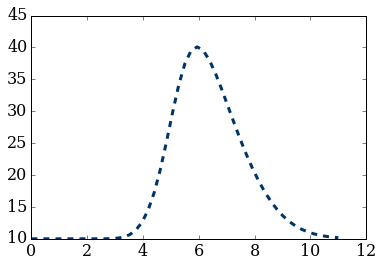

In [9]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)

In [10]:
v_sum = 0
for n in range (nx):
    v_sum = v_sum + V[n]
### change units    
print('The average velocity at t=3 minutes is v ={:.2f} m/s'.format((v_sum/nx)/3.6))

The average velocity at t=3 minutes is v =20.64 m/s


In [11]:
v_6_min = V[0]
for i in range(0,nx):
    if V[i] < v_6_min:
        v_6_min = V[i]
print('The average velocity at t=6 minutes is v ={:.2f} m/s'.format(v_6_min/3.6))

The average velocity at t=6 minutes is v =18.66 m/s
